# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from palmerpenguins import load_penguins
from plotnine import ggplot, aes, geom_line, geom_abline, labs

In [4]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [6]:
# dummify
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

#ct.fit_transform(penguins)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [7]:
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# kNN model with k=1
k1_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=1))
])

k1_pipeline.fit(X_train, y_train)

# Predictions
k1_train_pred = k1_pipeline.predict(X_train)
k1_test_pred = k1_pipeline.predict(X_test)

# Compute training and test errors
k1_train_error = accuracy_score(y_train, k1_train_pred)
k1_test_error = accuracy_score(y_test, k1_test_pred)


print(f"kNN(k=1) Classification - Training Accuracy: {k1_train_error:.3f}, Test Accuracy: {k1_test_error:.3f}")

kNN(k=1) Classification - Training Accuracy: 1.000, Test Accuracy: 0.976


In [8]:
print(k1_pipeline.named_steps['knn'].classes_)

['Adelie' 'Chinstrap' 'Gentoo']


In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, k1_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[36  1  0]
 [ 1 16  0]
 [ 0  0 30]]


In [10]:
# Overall accuracy
accuracy = accuracy_score(y_test, k1_test_pred)
print(f"Overall Accuracy: {accuracy:.3f}")

Overall Accuracy: 0.976


In [11]:
species_classes = ["Adelie", "Chinstrap", "Gentoo"]

# Classification report
print("Classification Report:")
print(classification_report(y_test, k1_test_pred, target_names=species_classes))

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        37
   Chinstrap       0.94      0.94      0.94        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84



In [12]:
# kNN model with k=10
k100_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=100))
])

k100_pipeline.fit(X_train, y_train)

# Predictions
k100_train_pred = k100_pipeline.predict(X_train)
k100_test_pred = k100_pipeline.predict(X_test)

# Compute training and test errors using accuracy_score for classification
k100_train_error = accuracy_score(y_train, k100_train_pred)
k100_test_error = accuracy_score(y_test, k100_test_pred)


print(f"kNN(k=100) Classification - Training Accuracy: {k100_train_error:.3f}, Test Accuracy: {k100_test_error:.3f}")

kNN(k=100) Classification - Training Accuracy: 0.876, Test Accuracy: 0.881


In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, k100_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[37  0  0]
 [10  7  0]
 [ 0  0 30]]


In [14]:
# Overall accuracy
accuracy = accuracy_score(y_test, k100_test_pred)
print(f"Overall Accuracy: {accuracy:.3f}")

Overall Accuracy: 0.881


In [15]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, k100_test_pred, target_names=species_classes))

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.79      1.00      0.88        37
   Chinstrap       1.00      0.41      0.58        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.88        84
   macro avg       0.93      0.80      0.82        84
weighted avg       0.91      0.88      0.86        84



In [16]:
dt1_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth=1, random_state=42))
])

dt1_pipeline.fit(X_train, y_train)

# Predictions
dt1_train_pred = dt1_pipeline.predict(X_train)
dt1_test_pred = dt1_pipeline.predict(X_test)

# Compute training and test errors using accuracy_score for classification
dt1_train_error = accuracy_score(y_train, dt1_train_pred)
dt1_test_error = accuracy_score(y_test, dt1_test_pred)


print(f"Decision Tree Classification(Max Depth = 1) - Training Accuracy: {dt1_train_error:.3f}, Test Accuracy: {dt1_test_error:.3f}")

Decision Tree Classification(Max Depth = 1) - Training Accuracy: 0.787, Test Accuracy: 0.774


In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, dt1_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[37  0  0]
 [17  0  0]
 [ 2  0 28]]


In [18]:
# Overall accuracy
accuracy = accuracy_score(y_test, dt1_test_pred)
print(f"Overall Accuracy: {accuracy:.3f}")

Overall Accuracy: 0.774


In [19]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, dt1_test_pred, target_names=species_classes))

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.66      1.00      0.80        37
   Chinstrap       0.00      0.00      0.00        17
      Gentoo       1.00      0.93      0.97        30

    accuracy                           0.77        84
   macro avg       0.55      0.64      0.59        84
weighted avg       0.65      0.77      0.70        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [20]:
dt10_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth=10, random_state=42))
])

dt10_pipeline.fit(X_train, y_train)

# Predictions
dt10_train_pred = dt10_pipeline.predict(X_train)
dt10_test_pred = dt10_pipeline.predict(X_test)

# Compute training and test errors using accuracy_score for classification
dt10_train_error = accuracy_score(y_train, dt10_train_pred)
dt10_test_error = accuracy_score(y_test, dt10_test_pred)


print(f"Decision Tree Classification(Max Depth = 10) - Training Accuracy: {dt10_train_error:.3f}, Test Accuracy: {dt10_test_error:.3f}")

Decision Tree Classification(Max Depth = 10) - Training Accuracy: 1.000, Test Accuracy: 0.976


In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, dt10_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[37  0  0]
 [ 0 17  0]
 [ 2  0 28]]


In [22]:
# Overall accuracy
accuracy = accuracy_score(y_test, dt10_test_pred)
print(f"Overall Accuracy: {accuracy:.3f}")

Overall Accuracy: 0.976


In [23]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, dt10_test_pred, target_names=species_classes))

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      0.93      0.97        30

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



Chose 'Adelie' as it has a relatively high F1 score in each model indicating a fair balance between precision and recall.

In [24]:
# plot
chosen_species = "Adelie"
species_index = species_classes.index(chosen_species)

# Get the true binary labels for the chosen species
y_test_binary = (y_test == chosen_species).astype(int)

# Get the predicted probabilities for the chosen species
k1_test_pred_proba = k1_pipeline.predict_proba(X_test)[:, species_index]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, k1_test_pred_proba)

# Convert to DataFrame for use with plotnine
roc_data = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})


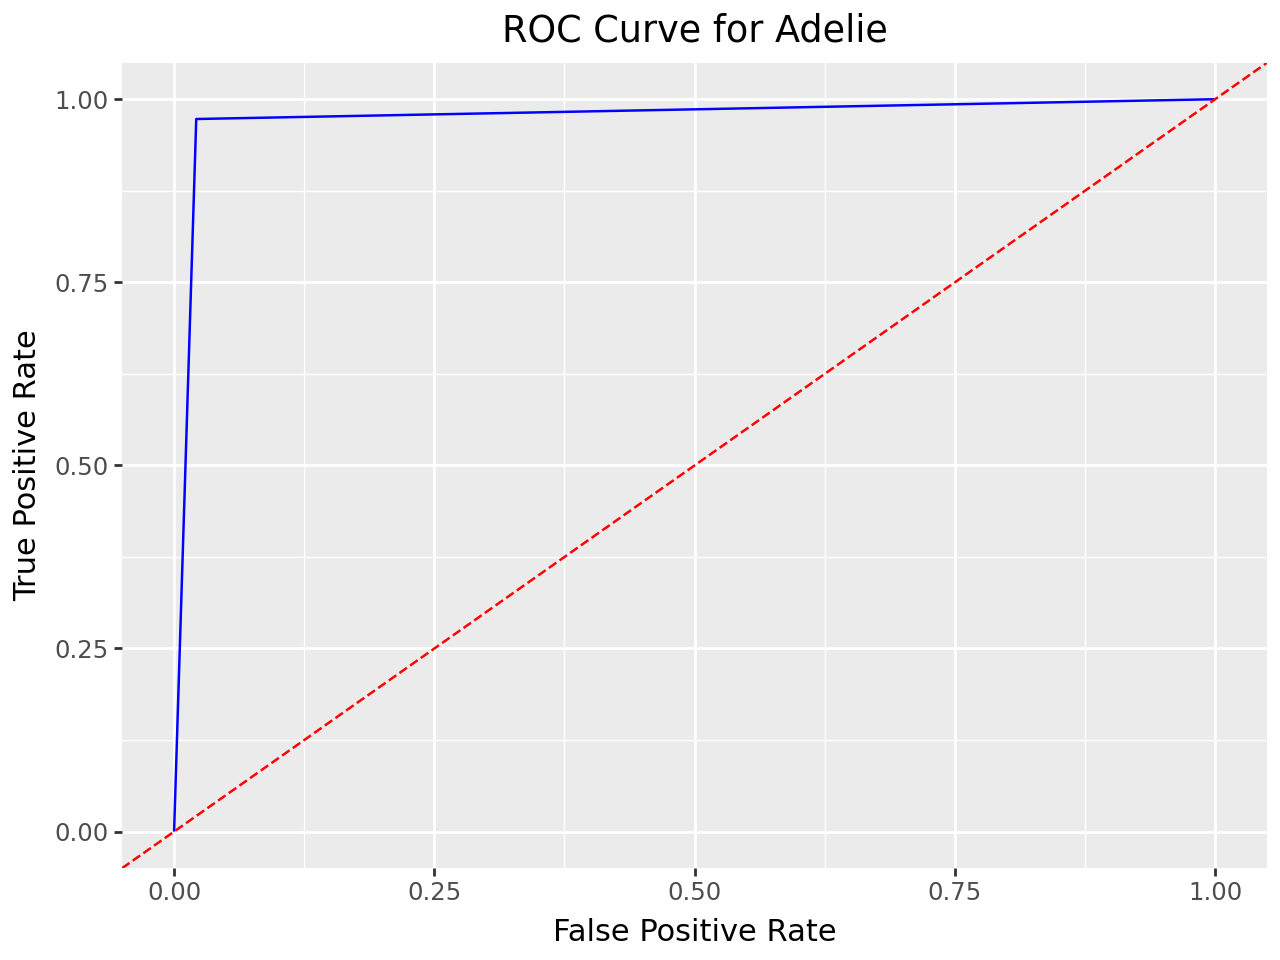

In [25]:
# Create the ROC plot
roc_plot = (
    ggplot(roc_data, aes(x="FPR", y="TPR")) +
    geom_line(color="blue") +  # ROC curve
    geom_abline(slope=1, intercept=0, linetype="dashed", color="red") +  # Diagonal line
    labs(
        title=f"ROC Curve for {chosen_species}",
        x="False Positive Rate",
        y="True Positive Rate"
    )
)

roc_plot
